In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# <center>Billboard Year-End Charts Analysis</center>

## Brief Overview
The [Billboard Year-End chart](https://www.billboard.com/charts/year-end/2020/hot-100-songs) is a chart published by Billboard each year that displays yearly rankings of the top 100 songs, as determined by the Billboard company themself. According to Billboard, rankings are determined based on factors such as sales, amount of streams on music streaming services such as Spotify, and how frequently songs are played on radio stations. Each billboard chart year starts and ends around the month of December.

But does Billboard really rank their charts based on measures such as popularity, as they claim? In this project, I collected data of every song that has appeared on the Billboard Year-End charts from years 1960-2020, along with measures such as popularity and other audio features of each song, to answer this question. I also used the collected data to observe if there were any common characteristics among songs that appeared on Billboard charts, if there were any relationships among variables such as the audio features of songs and the year it was ranked on the charts, and to explore which artists/songs appeared most often.

# Outline:
1. Web Scraping Wikipedia's Billboard Year-End Charts
2. Extracting Spotify Ids (using Spotify's API) and cleaning data
3. Extracting Spotify Audio Features (using Spotify's API) to add even more data
4. Exploring Billboard's Hot 100 Year-End Charts (1960-2020) with visuals

# 1. Web Scraping Wikipedia's Billboard Year-End Charts

### About:

This part extracts song information from Wikipedia's pages for Billboard's Year-End Hot 100 charts for years 1960-2020.

### Website: 

https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1960 (*Replace 1960 with any desired year between 1960-2020*)

Note that there are three years (1963, 1966, 1975) that had an original list, but were revised by Billboard due to errors or recalculations. So the old lists eventually got replaced with a newer list. We will account for these changes and use the revised lists to collect the data in our web scraping.

**Import necessary libraries for scraping websites**

In [ ]:
import csv
import time
import requests
import bs4

In [ ]:
# Wikipedia Billboard Year-End pages from 1960-Present follow this format
base_url = "https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_{}"

For whatever reason, the HTML formatting used for the 2020 Wikipedia page is a bit different than all the other previous years. We'll just go ahead and begin by web scraping every year besides 2020.

In [ ]:
# initizialize empty list
song_list = []

# loop through each year and extract relevant song information to list
for year in range(1960,2020):
    res = requests.get(base_url.format(year))
    soup = bs4.BeautifulSoup(res.text, "lxml")
    
    # break out of loop if website technical issues occur
    if res.status_code != 200:
        print("ERROR. CANNOT SCRAPE ANYMORE.")
        break
    
    # select revised list if it exists, else get the original list
    try:
        selection = soup.select('.wikitable')[1]
    except:
        selection = soup.select('.wikitable')[0]
    
    tr = selection.select('tr')
    
    # add each row to song list
    for item in tr[1:]:
        row_list = []

        # append rankings
        rank = item.select('td')[0].text
        row_list.append(rank)
        
        # append song titles
        title = item.select('td')[1].text
        row_list.append(title.strip('"'))
        
        # append song artists
        artist = item.select('td')[2].text
        row_list.append(artist.strip('\n'))
        
        # append Billboard year    
        row_list.append(year)
        
        # append row with all of the data above
        song_list.append(row_list)
        
    # slowdown to avoid making quick requests
    time.sleep(5)

Let's output the first 5 rows and last 5 rows of our list.

In [ ]:
song_list[-5:]

In [363]:
song_list[0:5]

[['1', 'Theme from A Summer Place', 'Percy Faith', 1960],
 ['2', "He'll Have to Go", 'Jim Reeves', 1960],
 ['3', "Cathy's Clown", 'The Everly Brothers', 1960],
 ['4', 'Running Bear', 'Johnny Preston', 1960],
 ['5', 'Teen Angel', 'Mark Dinning', 1960]]

In [364]:
song_list[-5:]

[['96', 'Eyes on You', 'Chase Rice', 2019],
 ['97', 'All to Myself', 'Dan + Shay', 2019],
 ['98', 'Boyfriend', 'Ariana Grande and Social House', 2019],
 ['99', 'Walk Me Home', 'Pink', 2019],
 ['100', 'Robbery', 'Juice Wrld', 2019]]

Seems like everything is working correctly. We still need song information for the year 2020, so we'll go ahead and do that now using similar code as above, but accounting for the different HTML formatting used in the Wikipedia page for the year 2020.

In [344]:
# initizialize empty list
song_list_2020 = []

# loop through each year and extract relevant song information to list
for year in range(2020,2021):
    res = requests.get(base_url.format(year))
    soup = bs4.BeautifulSoup(res.text, "lxml")
    
    # break out of loop if website technical issues occur
    if res.status_code != 200:
        print("ERROR. CANNOT SCRAPE ANYMORE.")
        break
    
    # select the original list
    selection = soup.select('.wikitable')[0]
    
    tr = selection.select('tr')
    
    # add each row to song list
    for item in tr[1:]:
        row_list = []
        
        # append rankings
        rank = item.select('th')[0].text
        row_list.append(rank.strip('\n'))
        
        # append song titles
        title = item.select('td')[0].text
        row_list.append(title.strip('"'))
        
        # append song artists
        artist = item.select('td')[1].text
        row_list.append(artist.strip('\n'))
        
        # append Billboard year    
        row_list.append(year)
        
        # append row with all of the data above
        song_list_2020.append(row_list)

Again, checking the first and last 5 rows of the list, it seems like everything is working as intended.

In [362]:
song_list_2020[0:5]

[['1', 'Blinding Lights', 'The Weeknd', 2020],
 ['2', 'Circles', 'Post Malone', 2020],
 ['3', 'The Box', 'Roddy Ricch', 2020],
 ['4', "Don't Start Now", 'Dua Lipa', 2020],
 ['5', 'Rockstar', 'DaBaby featuring Roddy Ricch', 2020]]

In [361]:
song_list_2020[-5:]

[['96', 'More Than My Hometown', 'Morgan Wallen', 2020],
 ['97', "Lovin' on You", 'Luke Combs', 2020],
 ['98', 'Said Sum', 'Moneybagg Yo', 2020],
 ['99', 'Slide', 'H.E.R. featuring YG', 2020],
 ['100', 'Walk Em Down', 'NLE Choppa featuring Roddy Ricch', 2020]]

With our final procedure, we will put everything we gathered together into a csv file.

In [ ]:
file = open('wikipedia_scraper.csv', mode='w', newline='')

In [ ]:
csv_writer = csv.writer(file, delimiter=',')

In [357]:
# write header row
csv_writer.writerow(['rank', 'title', 'artist', 'year'])

24

In [ ]:
csv_writer.writerows(song_list)
csv_writer.writerows(song_list_2020)

In [ ]:
file.close()

# 2. Extracting Spotify Ids (using Spotify's API) and cleaning data

In this part, Spotify URIs (Spotify ids) will be extracted using web developer tools from Spotify's Web API. With these Spotify URIs, we can retrieve song feature information such as the song's popularity, duration, loudness, etc.

More information here: https://developer.spotify.com/documentation/web-api/

## Imports

In [2]:
import pandas as pd

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

Start by reading the csv file we used for web scraping songs and artists.

In [2]:
music_data = pd.read_csv('wikipedia_scraper.csv', encoding='ISO-8859-1')

In [3]:
music_data.head()

,rank,title,artist,year
0,1,Theme from A Summer Place,Percy Faith,1960
1,2,He'll Have to Go,Jim Reeves,1960
2,3,Cathy's Clown,The Everly Brothers,1960
3,4,Running Bear,Johnny Preston,1960
4,5,Teen Angel,Mark Dinning,1960


## Spotify Web API

Before we can start using Spotify's Web API, we need to link Spotify to an application. I already created my own application on the website, and will save the application's client id and client secret to a file I created called *Spotify.txt*. Then I will save these information so that Spotify can authenticate access to their Web API.

In [5]:
file = 'Spotify.txt'

# store client id and client secret
with open(file,'r') as f: 
    f = f.read().splitlines()
    cid = f[0]
    secret = f[1]
    
# authenticate requests to the Spotify Web API
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

With authentication permitted, we will use artist name and song title from our dataframe to attempt and search for the corresponding Spotify URI. To get an understanding of how the web API works, I used the code below from https://developer.spotify.com/documentation/web-api/reference/search/search/. This code will create new columns in our existing dataframe for Spotify id and song popularity.

In [11]:
# Code used from: https://towardsdatascience.com/what-makes-a-song-great-part-2-e82a44be659c

def get_spotify_data(dataframe):
    """
    Takes a dataframe as input.
    Returns a list of track ids and a list of popularity scores from the Spotify API. 
    """
    from numpy import nan # we import np.nan to handle empty queries 
    track_ids = []
    popularities = []
    for [artist, song] in list(zip(dataframe['artist'], dataframe['title'])):
        try:
            song_data = sp.search(q='artist:' + artist + ' track:' + song, type='track')
            track_id = song_data['tracks']['items'][0]['id']
            popularity = song_data['tracks']['items'][0]['popularity']
            track_ids.append(track_id)
            popularities.append(popularity)
        except:
            track_ids.append(nan)
            popularities.append(nan)
    return track_ids, popularities
track_ids, popularities = get_spotify_data(music_data)
music_data['Spotify id'] = track_ids
music_data['Popularity'] = popularities
music_data

,rank,title,artist,year,Spotify id,Popularity
0,1,Theme from A Summer Place,Percy Faith,1960,6zwvB879PJSpTyFcg2wwnL,57.0
1,2,He'll Have to Go,Jim Reeves,1960,7dDE59NX0n466e705E8Itz,18.0
2,3,Cathy's Clown,The Everly Brothers,1960,1MA9StLzlFftLbuqOmoWij,52.0
3,4,Running Bear,Johnny Preston,1960,1RYznli2VNO7FCbW1Hq4KM,39.0
4,5,Teen Angel,Mark Dinning,1960,36NPEs4S7ik50NrlzaqoIJ,31.0
...,...,...,...,...,...,...
6096,96,More Than My Hometown,Morgan Wallen,2020,0eBXyY4SatzpE7opnzgXvz,83.0
6097,97,Lovin' on You,Luke Combs,2020,0nYvjcSlCgjcwogQAwIwNp,76.0
6098,98,Said Sum,Moneybagg Yo,2020,3sKz6Sd72K0ofPWcJPPk6H,75.0
6099,99,Slide,H.E.R. featuring YG,2020,NaN,NaN


In [13]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6101 entries, 0 to 6100
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        6101 non-null   object 
 1   title       6101 non-null   object 
 2   artist      6101 non-null   object 
 3   year        6101 non-null   int64  
 4   Spotify id  4950 non-null   object 
 5   Popularity  4950 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 286.1+ KB


In [14]:
music_data['Spotify id'].isnull().sum()

1151

## Splitting the artist column

There are a lot of songs without a Spotify id (1151 total). One reason why the Spotify ids for these songs were not extracted is because the get_spotify_data function does not recognize artists in the artist column that have multiple artists. These data contain strings such as "featuring", "and", and "&", so we'll split the artists into multiple columns that contain the primary artist and featured artists.

In [15]:
# the last two songs in our dataframe are good examples where spotify ids weren't extracted
music_data.tail()

,rank,title,artist,year,Spotify id,Popularity
6096,96,More Than My Hometown,Morgan Wallen,2020,0eBXyY4SatzpE7opnzgXvz,83.0
6097,97,Lovin' on You,Luke Combs,2020,0nYvjcSlCgjcwogQAwIwNp,76.0
6098,98,Said Sum,Moneybagg Yo,2020,3sKz6Sd72K0ofPWcJPPk6H,75.0
6099,99,Slide,H.E.R. featuring YG,2020,NaN,NaN
6100,100,Walk Em Down,NLE Choppa featuring Roddy Ricch,2020,NaN,NaN


In [45]:
# initialize with empty artist lists
artist_list = []
feat_artist_list = []

def split_artists(dataframe):
    '''
    Check if the artist column has any other featured artists.
    Then split the artists into lists
    '''
    
    for index, row in dataframe.iterrows():
        # if Spotify id doesn't exist, split the artist information
        if(pd.isnull(row['Spotify id'])):
            # string may contain certain characters that indicate multiple artists, so split the data
            artist_list.append(row['artist'].replace(" & ", "_" ).replace(" featuring ","_").replace(" and ","_").replace(", ","_").replace(" with ","_").split("_")[0])
            
            # there may or not be a featured artist, so check if this is true
            try:
                feat_artist_list.append(row['artist'].replace(" & ", "_" ).replace(" featuring ","_").replace(" and ","_").replace(", ","_").replace(" with ","_").split("_")[1])
            except:
                # No other artists for the song
                feat_artist_list.append("None")
        else:
            # Spotify id already exists, no need to split artist information
            artist_list.append(row['artist'])
            feat_artist_list.append("None")                               

In [17]:
split_artists(music_data)

In [18]:
# Check main artists
artist_list[-5:]

['Morgan Wallen', 'Luke Combs', 'Moneybagg Yo', 'H.E.R.', 'NLE Choppa']

In [19]:
# Check featured/secondary artists
feat_artist_list[-5:]

['None', 'None', 'None', 'YG', 'Roddy Ricch']

In [20]:
# another look at our dataframe
music_data

,rank,title,artist,year,Spotify id,Popularity
0,1,Theme from A Summer Place,Percy Faith,1960,6zwvB879PJSpTyFcg2wwnL,57.0
1,2,He'll Have to Go,Jim Reeves,1960,7dDE59NX0n466e705E8Itz,18.0
2,3,Cathy's Clown,The Everly Brothers,1960,1MA9StLzlFftLbuqOmoWij,52.0
3,4,Running Bear,Johnny Preston,1960,1RYznli2VNO7FCbW1Hq4KM,39.0
4,5,Teen Angel,Mark Dinning,1960,36NPEs4S7ik50NrlzaqoIJ,31.0
...,...,...,...,...,...,...
6096,96,More Than My Hometown,Morgan Wallen,2020,0eBXyY4SatzpE7opnzgXvz,83.0
6097,97,Lovin' on You,Luke Combs,2020,0nYvjcSlCgjcwogQAwIwNp,76.0
6098,98,Said Sum,Moneybagg Yo,2020,3sKz6Sd72K0ofPWcJPPk6H,75.0
6099,99,Slide,H.E.R. featuring YG,2020,NaN,NaN


We will insert the list of artists we obtained from using our defined function to our dataframe, along with any possible featured artists into two columns respectively: artist, other artists. If there are no other artists, we will insert "None" to the "other artists" column.

In [21]:
music_data["artist"] = artist_list

In [22]:
music_data["other artists"] = feat_artist_list

In [23]:
# other artists column has been added
music_data

,rank,title,artist,year,Spotify id,Popularity,other artists
0,1,Theme from A Summer Place,Percy Faith,1960,6zwvB879PJSpTyFcg2wwnL,57.0,None
1,2,He'll Have to Go,Jim Reeves,1960,7dDE59NX0n466e705E8Itz,18.0,None
2,3,Cathy's Clown,The Everly Brothers,1960,1MA9StLzlFftLbuqOmoWij,52.0,None
3,4,Running Bear,Johnny Preston,1960,1RYznli2VNO7FCbW1Hq4KM,39.0,None
4,5,Teen Angel,Mark Dinning,1960,36NPEs4S7ik50NrlzaqoIJ,31.0,None
...,...,...,...,...,...,...,...
6096,96,More Than My Hometown,Morgan Wallen,2020,0eBXyY4SatzpE7opnzgXvz,83.0,None
6097,97,Lovin' on You,Luke Combs,2020,0nYvjcSlCgjcwogQAwIwNp,76.0,None
6098,98,Said Sum,Moneybagg Yo,2020,3sKz6Sd72K0ofPWcJPPk6H,75.0,None
6099,99,Slide,H.E.R.,2020,NaN,NaN,YG


In [24]:
# reorder the columns
music_data = music_data[['rank', 'title', 'artist', 'other artists', 'year', 'Spotify id', 'Popularity']]

In [25]:
music_data

,rank,title,artist,other artists,year,Spotify id,Popularity
0,1,Theme from A Summer Place,Percy Faith,None,1960,6zwvB879PJSpTyFcg2wwnL,57.0
1,2,He'll Have to Go,Jim Reeves,None,1960,7dDE59NX0n466e705E8Itz,18.0
2,3,Cathy's Clown,The Everly Brothers,None,1960,1MA9StLzlFftLbuqOmoWij,52.0
3,4,Running Bear,Johnny Preston,None,1960,1RYznli2VNO7FCbW1Hq4KM,39.0
4,5,Teen Angel,Mark Dinning,None,1960,36NPEs4S7ik50NrlzaqoIJ,31.0
...,...,...,...,...,...,...,...
6096,96,More Than My Hometown,Morgan Wallen,None,2020,0eBXyY4SatzpE7opnzgXvz,83.0
6097,97,Lovin' on You,Luke Combs,None,2020,0nYvjcSlCgjcwogQAwIwNp,76.0
6098,98,Said Sum,Moneybagg Yo,None,2020,3sKz6Sd72K0ofPWcJPPk6H,75.0
6099,99,Slide,H.E.R.,YG,2020,NaN,NaN


With the new artist column that we recreated, let's reattempt and get the Spotify ids along with the song popularity.

In [29]:
track_ids, popularities = get_spotify_data(music_data)
music_data['Spotify id'] = track_ids
music_data['Popularity'] = popularities
music_data

,rank,title,artist,other artists,year,Spotify id,Popularity
0,1,Theme from A Summer Place,Percy Faith,None,1960,6zwvB879PJSpTyFcg2wwnL,57.0
1,2,He'll Have to Go,Jim Reeves,None,1960,7dDE59NX0n466e705E8Itz,18.0
2,3,Cathy's Clown,The Everly Brothers,None,1960,1MA9StLzlFftLbuqOmoWij,52.0
3,4,Running Bear,Johnny Preston,None,1960,1RYznli2VNO7FCbW1Hq4KM,39.0
4,5,Teen Angel,Mark Dinning,None,1960,36NPEs4S7ik50NrlzaqoIJ,31.0
...,...,...,...,...,...,...,...
6096,96,More Than My Hometown,Morgan Wallen,None,2020,0eBXyY4SatzpE7opnzgXvz,83.0
6097,97,Lovin' on You,Luke Combs,None,2020,0nYvjcSlCgjcwogQAwIwNp,76.0
6098,98,Said Sum,Moneybagg Yo,None,2020,3sKz6Sd72K0ofPWcJPPk6H,75.0
6099,99,Slide,H.E.R.,YG,2020,2rTnVB1bvwxHtaIl4uVu7f,77.0


In [30]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6101 entries, 0 to 6100
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           6101 non-null   object 
 1   title          6101 non-null   object 
 2   artist         6101 non-null   object 
 3   other artists  6101 non-null   object 
 4   year           6101 non-null   int64  
 5   Spotify id     5690 non-null   object 
 6   Popularity     5690 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 333.8+ KB


In [31]:
music_data['Spotify id'].isnull().sum()

411

## Dealing with the remaining, missing Spotify ids

We dropped the amount of null values from 1151 to 411. At this point, there's nothing else we can do with python to extract the remaining Spotify ids, so the rest must be done manually.

We will save the data frame as a csv file so we can add the Spotify ids manually in Excel.

In [32]:
music_data.to_csv('spotify_ids.csv')

After manually inserting Spotify ids and doing some cleaning in Excel, we import the csv file.

In [3]:
new_music_data = pd.read_csv('spotify_ids.csv', encoding='ISO-8859-1')

In [11]:
new_music_data

,Unnamed: 0,rank,title,artist,other artists,year,Spotify id,Popularity,Spotify id.1
0,0,1,Theme from A Summer Place,Percy Faith,None,1960,6zwvB879PJSpTyFcg2wwnL,57.0,6zwvB879PJSpTyFcg2wwnL
1,1,2,He'll Have to Go,Jim Reeves,None,1960,7dDE59NX0n466e705E8Itz,18.0,7dDE59NX0n466e705E8Itz
2,2,3,Cathy's Clown,The Everly Brothers,None,1960,1MA9StLzlFftLbuqOmoWij,52.0,1MA9StLzlFftLbuqOmoWij
3,3,4,Running Bear,Johnny Preston,None,1960,1RYznli2VNO7FCbW1Hq4KM,39.0,1RYznli2VNO7FCbW1Hq4KM
4,4,5,Teen Angel,Mark Dinning,None,1960,36NPEs4S7ik50NrlzaqoIJ,31.0,36NPEs4S7ik50NrlzaqoIJ
...,...,...,...,...,...,...,...,...,...
6096,6096,96,More Than My Hometown,Morgan Wallen,None,2020,0eBXyY4SatzpE7opnzgXvz,83.0,0eBXyY4SatzpE7opnzgXvz
6097,6097,97,Lovin' on You,Luke Combs,None,2020,0nYvjcSlCgjcwogQAwIwNp,76.0,0nYvjcSlCgjcwogQAwIwNp
6098,6098,98,Said Sum,Moneybagg Yo,None,2020,3sKz6Sd72K0ofPWcJPPk6H,75.0,3sKz6Sd72K0ofPWcJPPk6H
6099,6099,99,Slide,H.E.R.,YG,2020,2rTnVB1bvwxHtaIl4uVu7f,77.0,2rTnVB1bvwxHtaIl4uVu7f


In [6]:
new_music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6101 entries, 0 to 6100
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6101 non-null   int64  
 1   rank           6101 non-null   object 
 2   title          6101 non-null   object 
 3   artist         6101 non-null   object 
 4   other artists  6101 non-null   object 
 5   year           6101 non-null   int64  
 6   Spotify id     6098 non-null   object 
 7   Popularity     5690 non-null   float64
 8   Spotify id.1   6098 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 429.1+ KB


In [7]:
new_music_data.isnull().sum()

Unnamed: 0         0
rank               0
title              0
artist             0
other artists      0
year               0
Spotify id         3
Popularity       411
Spotify id.1       3
dtype: int64

In [8]:
new_music_data[new_music_data["Spotify id"].isnull()]

,Unnamed: 0,rank,title,artist,other artists,year,Spotify id,Popularity,Spotify id.1
2182,2182,82,It's Now or Never,John Schneider,None,1981,NaN,NaN,NaN
2297,2297,97,Goin' Down,Greg Guidry,None,1982,NaN,NaN,NaN
3772,3772,72,ESPN Presents The Jock Jam,Various Artists,None,1997,NaN,NaN,NaN


## Removing rows with missing information

There are still 3 Spotify ids that are missing. Since these are just a very small portion of our entire dataset, it should be okay to just drop these rows.

In [12]:
new_music_data = new_music_data.drop([new_music_data.index[2182],
                                      new_music_data.index[2297],
                                      new_music_data.index[3772]])

In [13]:
new_music_data

,Unnamed: 0,rank,title,artist,other artists,year,Spotify id,Popularity,Spotify id.1
0,0,1,Theme from A Summer Place,Percy Faith,None,1960,6zwvB879PJSpTyFcg2wwnL,57.0,6zwvB879PJSpTyFcg2wwnL
1,1,2,He'll Have to Go,Jim Reeves,None,1960,7dDE59NX0n466e705E8Itz,18.0,7dDE59NX0n466e705E8Itz
2,2,3,Cathy's Clown,The Everly Brothers,None,1960,1MA9StLzlFftLbuqOmoWij,52.0,1MA9StLzlFftLbuqOmoWij
3,3,4,Running Bear,Johnny Preston,None,1960,1RYznli2VNO7FCbW1Hq4KM,39.0,1RYznli2VNO7FCbW1Hq4KM
4,4,5,Teen Angel,Mark Dinning,None,1960,36NPEs4S7ik50NrlzaqoIJ,31.0,36NPEs4S7ik50NrlzaqoIJ
...,...,...,...,...,...,...,...,...,...
6096,6096,96,More Than My Hometown,Morgan Wallen,None,2020,0eBXyY4SatzpE7opnzgXvz,83.0,0eBXyY4SatzpE7opnzgXvz
6097,6097,97,Lovin' on You,Luke Combs,None,2020,0nYvjcSlCgjcwogQAwIwNp,76.0,0nYvjcSlCgjcwogQAwIwNp
6098,6098,98,Said Sum,Moneybagg Yo,None,2020,3sKz6Sd72K0ofPWcJPPk6H,75.0,3sKz6Sd72K0ofPWcJPPk6H
6099,6099,99,Slide,H.E.R.,YG,2020,2rTnVB1bvwxHtaIl4uVu7f,77.0,2rTnVB1bvwxHtaIl4uVu7f


After dropping the 3 rows, we now have no more rows with missing Spotify ids. We just need to deal with missing Popularity information.

In [14]:
new_music_data.isnull().sum()

Unnamed: 0         0
rank               0
title              0
artist             0
other artists      0
year               0
Spotify id         0
Popularity       408
Spotify id.1       0
dtype: int64

## Cleaning dataframe

But first, let's clean the columns with our new dataframe.

In [15]:
# Drop index column, as well as the old spotify id column
new_music_data = new_music_data.drop(['Unnamed: 0', 'Spotify id'], axis=1)

# Rename column
new_music_data = new_music_data.rename(columns={'Spotify id.1': 'Spotify id'})

# Reorder columns
new_music_data = new_music_data[['rank', 'title', 'artist', 'other artists', 'year', 'Spotify id', 'Popularity']]

In [17]:
new_music_data

,rank,title,artist,other artists,year,Spotify id,Popularity
0,1,Theme from A Summer Place,Percy Faith,None,1960,6zwvB879PJSpTyFcg2wwnL,57.0
1,2,He'll Have to Go,Jim Reeves,None,1960,7dDE59NX0n466e705E8Itz,18.0
2,3,Cathy's Clown,The Everly Brothers,None,1960,1MA9StLzlFftLbuqOmoWij,52.0
3,4,Running Bear,Johnny Preston,None,1960,1RYznli2VNO7FCbW1Hq4KM,39.0
4,5,Teen Angel,Mark Dinning,None,1960,36NPEs4S7ik50NrlzaqoIJ,31.0
...,...,...,...,...,...,...,...
6096,96,More Than My Hometown,Morgan Wallen,None,2020,0eBXyY4SatzpE7opnzgXvz,83.0
6097,97,Lovin' on You,Luke Combs,None,2020,0nYvjcSlCgjcwogQAwIwNp,76.0
6098,98,Said Sum,Moneybagg Yo,None,2020,3sKz6Sd72K0ofPWcJPPk6H,75.0
6099,99,Slide,H.E.R.,YG,2020,2rTnVB1bvwxHtaIl4uVu7f,77.0


## Splitting the artist column (again)

Again, let's split some of the data from the artist column as some may have been missed (particularly those that did have a Spotify id from early on).

In [18]:
artist_list = []
feat_artist_list = []

def split_artists(dataframe):
    '''
    Check if the artist column has featured artists, then split artists into lists
    '''
    for index, row in dataframe.iterrows():
        if(row['other artists'] == "None"):
            artist_list.append(row['artist'].replace(" & ", "_").replace(" featuring ","_").replace(" and ","_").replace(", ","_").replace(" with ","_").split("_")[0])
            
            #there may or not be a featured artist, so check if this is true
            try:
                feat_artist_list.append(row['artist'].replace(" & ", "_").replace(" featuring ","_").replace(" and ","_").replace(", ","_").replace(" with ","_").split("_")[1])
            except:
                feat_artist_list.append("None")
        else:
            artist_list.append(row['artist'])
            feat_artist_list.append(row['other artists'])                               

In [19]:
split_artists(new_music_data)

In [20]:
new_music_data["artist"] = artist_list
new_music_data["other artists"] = feat_artist_list

In [21]:
new_music_data

,rank,title,artist,other artists,year,Spotify id,Popularity
0,1,Theme from A Summer Place,Percy Faith,None,1960,6zwvB879PJSpTyFcg2wwnL,57.0
1,2,He'll Have to Go,Jim Reeves,None,1960,7dDE59NX0n466e705E8Itz,18.0
2,3,Cathy's Clown,The Everly Brothers,None,1960,1MA9StLzlFftLbuqOmoWij,52.0
3,4,Running Bear,Johnny Preston,None,1960,1RYznli2VNO7FCbW1Hq4KM,39.0
4,5,Teen Angel,Mark Dinning,None,1960,36NPEs4S7ik50NrlzaqoIJ,31.0
...,...,...,...,...,...,...,...
6096,96,More Than My Hometown,Morgan Wallen,None,2020,0eBXyY4SatzpE7opnzgXvz,83.0
6097,97,Lovin' on You,Luke Combs,None,2020,0nYvjcSlCgjcwogQAwIwNp,76.0
6098,98,Said Sum,Moneybagg Yo,None,2020,3sKz6Sd72K0ofPWcJPPk6H,75.0
6099,99,Slide,H.E.R.,YG,2020,2rTnVB1bvwxHtaIl4uVu7f,77.0


In [26]:
new_music_data.isnull().sum()

rank               0
title              0
artist             0
other artists      0
year               0
Spotify id         0
Popularity       408
dtype: int64

## Filling in the missing popularity data

Now let's fill in the missing data with popularity information using Spotify's Web API.

In [65]:
popularities = []

for id_ in new_music_data['Spotify id']:
    feature = sp.track(id_)['popularity']
    popularities.append(feature)

In [74]:
new_music_data['Popularity'] = popularities

In [77]:
new_music_data.isnull().sum()

rank             0
title            0
artist           0
other artists    0
year             0
Spotify id       0
Popularity       0
dtype: int64

There are no more missing values in our dataframe! Let's go ahead and save this into our csv file.

In [78]:
new_music_data.to_csv('spotify_ids.csv')

# 3. Extracting Spotify Audio Features (using Spotify's API) to add even more data

Our dataset currently has some information about each song title such as artists, Spotify id, and popularity, but there's a lot more features that we can add on to each of the songs in our dataset. Luckily, Spotify has audio features available for each song, so we will extract the audio features with Spotify's Web API.

More info on Spotify's audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

## Setup

In [48]:
import pandas as pd

import spotipy # for Spotify's Web API
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
file = 'Spotify.txt'

# store client id and client secret
with open(file,'r') as f: 
    f = f.read().splitlines()
    cid = f[0]
    secret = f[1]
    
# authenticate requests to the Spotify Web API
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Read csv file

In [51]:
# read the csv file containing each song information
music_data = pd.read_csv('spotify_ids.csv', encoding='ISO-8859-1')
music_data.drop('Unnamed: 0',axis=1,inplace=True)

In [52]:
music_data

,rank,title,artist,other artists,year,Spotify id,Popularity
0,1,Theme from A Summer Place,Percy Faith,None,1960,6zwvB879PJSpTyFcg2wwnL,57
1,2,He'll Have to Go,Jim Reeves,None,1960,7dDE59NX0n466e705E8Itz,18
2,3,Cathy's Clown,The Everly Brothers,None,1960,1MA9StLzlFftLbuqOmoWij,52
3,4,Running Bear,Johnny Preston,None,1960,1RYznli2VNO7FCbW1Hq4KM,39
4,5,Teen Angel,Mark Dinning,None,1960,36NPEs4S7ik50NrlzaqoIJ,31
...,...,...,...,...,...,...,...
6093,96,More Than My Hometown,Morgan Wallen,None,2020,0eBXyY4SatzpE7opnzgXvz,83
6094,97,Lovin' on You,Luke Combs,None,2020,0nYvjcSlCgjcwogQAwIwNp,76
6095,98,Said Sum,Moneybagg Yo,None,2020,3sKz6Sd72K0ofPWcJPPk6H,75
6096,99,Slide,H.E.R.,YG,2020,2rTnVB1bvwxHtaIl4uVu7f,77


## Extracting Audio Features

### Setup

Now that we have everything set up, let's take a look at what audio features are available from Spotify. We'll test this out on a song from our dataframe. We'll choose the first song from our dataframe called "Theme from a Summer Place" by Percy Faith. To get the audio features, we'll need to use its Spotify id.

In [55]:
# grab spotify id of song
song_id = music_data.loc[0]['Spotify id']
print(song_id)

6zwvB879PJSpTyFcg2wwnL


In [57]:
# extract audio features for our chosen song
sp.audio_features(song_id)

[{'danceability': 0.326,
  'energy': 0.326,
  'key': 0,
  'loudness': -15.144,
  'mode': 1,
  'speechiness': 0.0297,
  'acousticness': 0.591,
  'instrumentalness': 0.918,
  'liveness': 0.494,
  'valence': 0.87,
  'tempo': 186.232,
  'type': 'audio_features',
  'id': '6zwvB879PJSpTyFcg2wwnL',
  'uri': 'spotify:track:6zwvB879PJSpTyFcg2wwnL',
  'track_href': 'https://api.spotify.com/v1/tracks/6zwvB879PJSpTyFcg2wwnL',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6zwvB879PJSpTyFcg2wwnL',
  'duration_ms': 142693,
  'time_signature': 3}]

Next, we will grab the names of the audio features and insert an empty list for storing the values to each of the audio features.

In [90]:
# create list of names of the audio features
features_keys = list(features[0].keys())

In [91]:
features_keys

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [102]:
# initialize empty dictionary 
features_dict = {} 

# add empty list to each key
for key in features_keys:
    features_dict[key] = []

In [103]:
features_dict

{'danceability': [],
 'energy': [],
 'key': [],
 'loudness': [],
 'mode': [],
 'speechiness': [],
 'acousticness': [],
 'instrumentalness': [],
 'liveness': [],
 'valence': [],
 'tempo': [],
 'type': [],
 'id': [],
 'uri': [],
 'track_href': [],
 'analysis_url': [],
 'duration_ms': [],
 'time_signature': []}

## Using Spotify Web API

We were sucessfully able to get the audio features for a song, along with initializing a dictionary that will store each audio feature and its value. Now let's get the audio features for all the songs in our data.

In [99]:
# initialize empty list of audio features of each song
features = []

# get audio features for every song in data
for id_ in music_data['Spotify id']:
    features.append(sp.audio_features(id_)[0])

In [101]:
# taking a look at the features for a song
features[0]

{'danceability': 0.326,
 'energy': 0.326,
 'key': 0,
 'loudness': -15.144,
 'mode': 1,
 'speechiness': 0.0297,
 'acousticness': 0.591,
 'instrumentalness': 0.918,
 'liveness': 0.494,
 'valence': 0.87,
 'tempo': 186.232,
 'type': 'audio_features',
 'id': '6zwvB879PJSpTyFcg2wwnL',
 'uri': 'spotify:track:6zwvB879PJSpTyFcg2wwnL',
 'track_href': 'https://api.spotify.com/v1/tracks/6zwvB879PJSpTyFcg2wwnL',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6zwvB879PJSpTyFcg2wwnL',
 'duration_ms': 142693,
 'time_signature': 3}

In [126]:
item = None

# insert the values for each song feature
for song in features:
    item = song.items()
    for key,value in item:
        features_dict[key].append(value)

## Adding audio features to dataframe

We now have all the audio features, so let's add these to our dataframe.

In [131]:
for key in features_dict.keys():
    music_data[key] = features_dict[key]

In [132]:
music_data

,rank,title,artist,other artists,year,Spotify id,Popularity,danceability,energy,key,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,1,Theme from A Summer Place,Percy Faith,None,1960,6zwvB879PJSpTyFcg2wwnL,57,0.326,0.3260,0,...,0.4940,0.870,186.232,audio_features,6zwvB879PJSpTyFcg2wwnL,spotify:track:6zwvB879PJSpTyFcg2wwnL,https://api.spotify.com/v1/tracks/6zwvB879PJSp...,https://api.spotify.com/v1/audio-analysis/6zwv...,142693,3
1,2,He'll Have to Go,Jim Reeves,None,1960,7dDE59NX0n466e705E8Itz,18,0.469,0.2440,1,...,0.8450,0.577,88.271,audio_features,7dDE59NX0n466e705E8Itz,spotify:track:7dDE59NX0n466e705E8Itz,https://api.spotify.com/v1/tracks/7dDE59NX0n46...,https://api.spotify.com/v1/audio-analysis/7dDE...,134333,3
2,3,Cathy's Clown,The Everly Brothers,None,1960,1MA9StLzlFftLbuqOmoWij,52,0.498,0.5820,7,...,0.3720,0.866,119.809,audio_features,1MA9StLzlFftLbuqOmoWij,spotify:track:1MA9StLzlFftLbuqOmoWij,https://api.spotify.com/v1/tracks/1MA9StLzlFft...,https://api.spotify.com/v1/audio-analysis/1MA9...,144013,4
3,4,Running Bear,Johnny Preston,None,1960,1RYznli2VNO7FCbW1Hq4KM,39,0.772,0.2970,5,...,0.1250,0.822,119.987,audio_features,1RYznli2VNO7FCbW1Hq4KM,spotify:track:1RYznli2VNO7FCbW1Hq4KM,https://api.spotify.com/v1/tracks/1RYznli2VNO7...,https://api.spotify.com/v1/audio-analysis/1RYz...,158200,4
4,5,Teen Angel,Mark Dinning,None,1960,36NPEs4S7ik50NrlzaqoIJ,31,0.570,0.0636,0,...,0.1220,0.282,101.517,audio_features,36NPEs4S7ik50NrlzaqoIJ,spotify:track:36NPEs4S7ik50NrlzaqoIJ,https://api.spotify.com/v1/tracks/36NPEs4S7ik5...,https://api.spotify.com/v1/audio-analysis/36NP...,159893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6093,96,More Than My Hometown,Morgan Wallen,None,2020,0eBXyY4SatzpE7opnzgXvz,83,0.621,0.8820,6,...,0.1320,0.574,126.014,audio_features,0eBXyY4SatzpE7opnzgXvz,spotify:track:0eBXyY4SatzpE7opnzgXvz,https://api.spotify.com/v1/tracks/0eBXyY4Satzp...,https://api.spotify.com/v1/audio-analysis/0eBX...,216573,4
6094,97,Lovin' on You,Luke Combs,None,2020,0nYvjcSlCgjcwogQAwIwNp,76,0.572,0.9490,4,...,0.1630,0.530,118.974,audio_features,0nYvjcSlCgjcwogQAwIwNp,spotify:track:0nYvjcSlCgjcwogQAwIwNp,https://api.spotify.com/v1/tracks/0nYvjcSlCgjc...,https://api.spotify.com/v1/audio-analysis/0nYv...,194867,4
6095,98,Said Sum,Moneybagg Yo,None,2020,3sKz6Sd72K0ofPWcJPPk6H,75,0.929,0.6670,8,...,0.1000,0.274,126.998,audio_features,3sKz6Sd72K0ofPWcJPPk6H,spotify:track:3sKz6Sd72K0ofPWcJPPk6H,https://api.spotify.com/v1/tracks/3sKz6Sd72K0o...,https://api.spotify.com/v1/audio-analysis/3sKz...,155168,4
6096,99,Slide,H.E.R.,YG,2020,2rTnVB1bvwxHtaIl4uVu7f,77,0.827,0.4690,10,...,0.2070,0.196,97.028,audio_features,2rTnVB1bvwxHtaIl4uVu7f,spotify:track:2rTnVB1bvwxHtaIl4uVu7f,https://api.spotify.com/v1/tracks/2rTnVB1bvwxH...,https://api.spotify.com/v1/audio-analysis/2rTn...,238321,4


In [135]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6098 entries, 0 to 6097
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              6098 non-null   object 
 1   title             6098 non-null   object 
 2   artist            6098 non-null   object 
 3   other artists     6098 non-null   object 
 4   year              6098 non-null   int64  
 5   Spotify id        6098 non-null   object 
 6   Popularity        6098 non-null   int64  
 7   danceability      6098 non-null   float64
 8   energy            6098 non-null   float64
 9   key               6098 non-null   int64  
 10  loudness          6098 non-null   float64
 11  mode              6098 non-null   int64  
 12  speechiness       6098 non-null   float64
 13  acousticness      6098 non-null   float64
 14  instrumentalness  6098 non-null   float64
 15  liveness          6098 non-null   float64
 16  valence           6098 non-null   float64


## Cleaning Data

There are some interesting audio features shown, but there are also some that aren't as useful such as id and uri. We'll drop the columns that we won't need.

### Dropping columns

In [139]:
music_data = music_data.drop(['Spotify id','type','id','uri','track_href','analysis_url'], axis = 1)

In [140]:
music_data

,rank,title,artist,other artists,year,Spotify id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Theme from A Summer Place,Percy Faith,None,1960,6zwvB879PJSpTyFcg2wwnL,57,0.326,0.3260,0,-15.144,1,0.0297,0.59100,0.918000,0.4940,0.870,186.232,142693,3
1,2,He'll Have to Go,Jim Reeves,None,1960,7dDE59NX0n466e705E8Itz,18,0.469,0.2440,1,-15.702,1,0.0357,0.97400,0.016200,0.8450,0.577,88.271,134333,3
2,3,Cathy's Clown,The Everly Brothers,None,1960,1MA9StLzlFftLbuqOmoWij,52,0.498,0.5820,7,-8.961,1,0.0339,0.41200,0.000000,0.3720,0.866,119.809,144013,4
3,4,Running Bear,Johnny Preston,None,1960,1RYznli2VNO7FCbW1Hq4KM,39,0.772,0.2970,5,-14.679,0,0.0530,0.85400,0.000008,0.1250,0.822,119.987,158200,4
4,5,Teen Angel,Mark Dinning,None,1960,36NPEs4S7ik50NrlzaqoIJ,31,0.570,0.0636,0,-18.548,1,0.0459,0.93600,0.000000,0.1220,0.282,101.517,159893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6093,96,More Than My Hometown,Morgan Wallen,None,2020,0eBXyY4SatzpE7opnzgXvz,83,0.621,0.8820,6,-5.010,1,0.0459,0.60100,0.000000,0.1320,0.574,126.014,216573,4
6094,97,Lovin' on You,Luke Combs,None,2020,0nYvjcSlCgjcwogQAwIwNp,76,0.572,0.9490,4,-4.865,1,0.0600,0.00165,0.000195,0.1630,0.530,118.974,194867,4
6095,98,Said Sum,Moneybagg Yo,None,2020,3sKz6Sd72K0ofPWcJPPk6H,75,0.929,0.6670,8,-6.789,0,0.3530,0.01850,0.000000,0.1000,0.274,126.998,155168,4
6096,99,Slide,H.E.R.,YG,2020,2rTnVB1bvwxHtaIl4uVu7f,77,0.827,0.4690,10,-9.141,0,0.3410,0.08070,0.000008,0.2070,0.196,97.028,238321,4


### Creating and adding new column

There's one more thing I'd like to add to this column, and that's converting the duration of the song from ms to seconds. The column duration_ms has the duration length of the song in milliseconds, so converting to seconds would be much easier to interpret.

In [151]:
# convert ms to s
music_data['duration_ms'] = music_data['duration_ms'] / 1000.0

# rename column
music_data = music_data.rename(columns={'duration_ms': 'duration'})

## Final look at dataframe

In [152]:
music_data

,rank,title,artist,other artists,year,Spotify id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,1,Theme from A Summer Place,Percy Faith,None,1960,6zwvB879PJSpTyFcg2wwnL,57,0.326,0.3260,0,-15.144,1,0.0297,0.59100,0.918000,0.4940,0.870,186.232,142.693,3
1,2,He'll Have to Go,Jim Reeves,None,1960,7dDE59NX0n466e705E8Itz,18,0.469,0.2440,1,-15.702,1,0.0357,0.97400,0.016200,0.8450,0.577,88.271,134.333,3
2,3,Cathy's Clown,The Everly Brothers,None,1960,1MA9StLzlFftLbuqOmoWij,52,0.498,0.5820,7,-8.961,1,0.0339,0.41200,0.000000,0.3720,0.866,119.809,144.013,4
3,4,Running Bear,Johnny Preston,None,1960,1RYznli2VNO7FCbW1Hq4KM,39,0.772,0.2970,5,-14.679,0,0.0530,0.85400,0.000008,0.1250,0.822,119.987,158.200,4
4,5,Teen Angel,Mark Dinning,None,1960,36NPEs4S7ik50NrlzaqoIJ,31,0.570,0.0636,0,-18.548,1,0.0459,0.93600,0.000000,0.1220,0.282,101.517,159.893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6093,96,More Than My Hometown,Morgan Wallen,None,2020,0eBXyY4SatzpE7opnzgXvz,83,0.621,0.8820,6,-5.010,1,0.0459,0.60100,0.000000,0.1320,0.574,126.014,216.573,4
6094,97,Lovin' on You,Luke Combs,None,2020,0nYvjcSlCgjcwogQAwIwNp,76,0.572,0.9490,4,-4.865,1,0.0600,0.00165,0.000195,0.1630,0.530,118.974,194.867,4
6095,98,Said Sum,Moneybagg Yo,None,2020,3sKz6Sd72K0ofPWcJPPk6H,75,0.929,0.6670,8,-6.789,0,0.3530,0.01850,0.000000,0.1000,0.274,126.998,155.168,4
6096,99,Slide,H.E.R.,YG,2020,2rTnVB1bvwxHtaIl4uVu7f,77,0.827,0.4690,10,-9.141,0,0.3410,0.08070,0.000008,0.2070,0.196,97.028,238.321,4


In [153]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6098 entries, 0 to 6097
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              6098 non-null   object 
 1   title             6098 non-null   object 
 2   artist            6098 non-null   object 
 3   other artists     6098 non-null   object 
 4   year              6098 non-null   int64  
 5   Spotify id        6098 non-null   object 
 6   Popularity        6098 non-null   int64  
 7   danceability      6098 non-null   float64
 8   energy            6098 non-null   float64
 9   key               6098 non-null   int64  
 10  loudness          6098 non-null   float64
 11  mode              6098 non-null   int64  
 12  speechiness       6098 non-null   float64
 13  acousticness      6098 non-null   float64
 14  instrumentalness  6098 non-null   float64
 15  liveness          6098 non-null   float64
 16  valence           6098 non-null   float64


Our data cleaning is complete, and we are ready to convert this into a csv file.

In [154]:
music_data.to_csv('spotify_complete.csv')

# 4. Exploring Billboard's Hot 100 Year-End Charts (1960-2020) with visuals

### Exploratory data analysis outline:

    1. Get a high level understanding of the data (shape, columns, data types, etc.)
    2. Comparisons of which artists and songs appear most often on Billboard charts
    3. Exploring popularity of songs and seeing if that has an influence on being ranked
    4. Looking at other characteristics (danceability, energy, etc.) of songs

## Part 1: Understanding the data

### The data

`spotify_complete.csv` contains every song that has appeared on the Billboard Hot 100 Year-end charts. It contains song information such as the artist(s), year appeared on Billboard, ranking, and audio features. The data was pulled on January 7, 2021.

Column | Definition
--- | ---
rank | ranking of the song on Billboard
title | the name of the song
artist | the main artist who performed the song
other artists | other artists who performed the song
year | year that the song has appeared on the Billboard chart
Spotify id | spotify ID of the song
Popularity | popularity of the song at the time when data was extracted
danceability | how suitable a song is for dancing
energy | measure of intensity and activity
key | overall key of the song
loudness | overall loudness in decibels
modality | modality of song (0 = Minor, 1 = Major)
speechiness | overall measure of spoken words
acousticness | measure of whether the song is acoustic
instrumentalness | measure of whether the song contains vocals
liveness | probability the song was performed live
valence | measure of musical positiveness
tempo | overall estimated speed or pace of song in beats per minute
duration | how long the song is in seconds
time_signature | overall time signature of a song

More information on Spotify's audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

### Importing libraries that we will use:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the data
df = pd.read_csv('spotify_complete.csv', encoding='ISO-8859-1')
df.drop("Unnamed: 0", axis=1, inplace=True) # this is an index column that we already have

In [30]:
df.shape

(6098, 20)

In [31]:
df.head()

,rank,title,artist,other artists,year,Spotify id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,1,Theme from A Summer Place,Percy Faith,None,1960,6zwvB879PJSpTyFcg2wwnL,57,0.326,0.3260,0,-15.144,1,0.0297,0.591,0.918000,0.494,0.870,186.232,142.693,3
1,2,He'll Have to Go,Jim Reeves,None,1960,7dDE59NX0n466e705E8Itz,18,0.469,0.2440,1,-15.702,1,0.0357,0.974,0.016200,0.845,0.577,88.271,134.333,3
2,3,Cathy's Clown,The Everly Brothers,None,1960,1MA9StLzlFftLbuqOmoWij,52,0.498,0.5820,7,-8.961,1,0.0339,0.412,0.000000,0.372,0.866,119.809,144.013,4
3,4,Running Bear,Johnny Preston,None,1960,1RYznli2VNO7FCbW1Hq4KM,39,0.772,0.2970,5,-14.679,0,0.0530,0.854,0.000008,0.125,0.822,119.987,158.200,4
4,5,Teen Angel,Mark Dinning,None,1960,36NPEs4S7ik50NrlzaqoIJ,31,0.570,0.0636,0,-18.548,1,0.0459,0.936,0.000000,0.122,0.282,101.517,159.893,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6098 entries, 0 to 6097
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              6098 non-null   int64  
 1   title             6098 non-null   object 
 2   artist            6098 non-null   object 
 3   other artists     6098 non-null   object 
 4   year              6098 non-null   int64  
 5   Spotify id        6098 non-null   object 
 6   Popularity        6098 non-null   int64  
 7   danceability      6098 non-null   float64
 8   energy            6098 non-null   float64
 9   key               6098 non-null   int64  
 10  loudness          6098 non-null   float64
 11  mode              6098 non-null   int64  
 12  speechiness       6098 non-null   float64
 13  acousticness      6098 non-null   float64
 14  instrumentalness  6098 non-null   float64
 15  liveness          6098 non-null   float64
 16  valence           6098 non-null   float64


In [6]:
df.describe()

,rank,year,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
count,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000
mean,50.491801,1989.998196,57.206789,0.627328,0.620230,5.290095,-8.403208,0.692358,0.072196,0.260426,0.028466,0.178272,0.604125,119.430655,231.916182,3.955395
std,28.869856,17.612298,17.275689,0.151422,0.190002,3.589750,3.545482,0.461555,0.077274,0.259243,0.128605,0.149371,0.239647,27.478116,63.693433,0.272839
min,1.000000,1960.000000,0.000000,0.000000,0.000020,0.000000,-26.113000,0.000000,0.000000,0.000024,0.000000,0.015000,0.000000,0.000000,29.688000,0.000000
25%,25.250000,1975.000000,47.000000,0.532000,0.484000,2.000000,-10.703750,0.000000,0.032200,0.043225,0.000000,0.085700,0.418000,98.942250,193.390250,4.000000
50%,50.000000,1990.000000,60.000000,0.642000,0.634000,5.000000,-7.817000,1.000000,0.041800,0.166000,0.000004,0.122000,0.623000,118.029000,228.000000,4.000000
75%,75.000000,2005.000000,70.000000,0.734000,0.770000,8.000000,-5.652250,1.000000,0.069300,0.418750,0.000341,0.226000,0.809000,134.185500,261.900250,4.000000
max,100.000000,2020.000000,100.000000,0.988000,0.997000,11.000000,-1.101000,1.000000,0.911000,0.991000,0.964000,0.991000,0.991000,233.429000,1561.133000,5.000000


## Part 2: Comparing frequency of songs and artists

**Which artists have appeared on the Billboard charts most often?**

In [7]:
# count number of unique, main artists
df['artist'].nunique()

2368

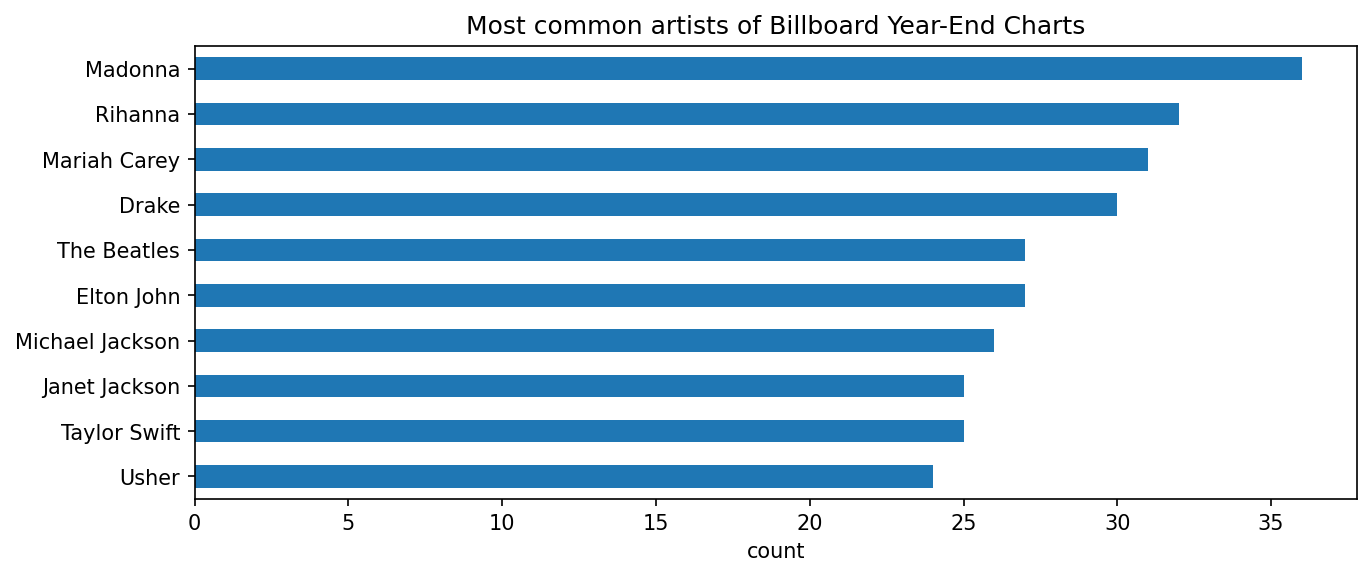

In [244]:
# horizontal bar chart of top 10 artists
plt.figure(figsize=(10,4),dpi=150)
plt.title("Most common artists of Billboard Year-End Charts")
plt.xlabel("count")

# sort by highest frequency
df['artist'].value_counts().nlargest(10).sort_values().plot(kind = 'barh')

# save image
plt.savefig('artists.png',dpi=200);

*It is important to note that these counts are based on the artists being the main artist of their respective song. It does not take into account that the artists could be featured in a song with other singers.*

Let's check what the highest ranking that these artists have ever obtained.

In [9]:
# create list of the most common artists
top_artists = ['Madonna','Rihanna','Mariah Carey','Drake','The Beatles',
               'Elton John','Michael Jackson','Janet Jackson','Taylor Swift','Usher']

# only extract rows in original dataframe that contains most common artists
top_artists_df = df[df['artist'].isin(top_artists)]

# grab highest ranking (minimum ranking in df) for each artist
top_artists_df.groupby(['artist'])['rank'].min().sort_values()

artist
Drake              1
Elton John         1
Mariah Carey       1
The Beatles        1
Usher              1
Madonna            2
Michael Jackson    2
Rihanna            2
Janet Jackson      3
Taylor Swift       5
Name: rank, dtype: int64

Half of these artists have achieved rank #1 in the history of Billboard Year-End charts. The other half are very close, having ranked at least top 5.

**How do songs that were performed solo compare to those performed by multiple artists?**

The next thing I want to take a look at is to observe the percentage of songs that were performed solo by a single artist versus the percentage of songs that were performed with multiple artists.

In [10]:
# counts number of songs that don't have other performing artists 
# (in other words, count songs with a single performer)
df[df['other artists'] != "None"]["other artists"].count()

1220

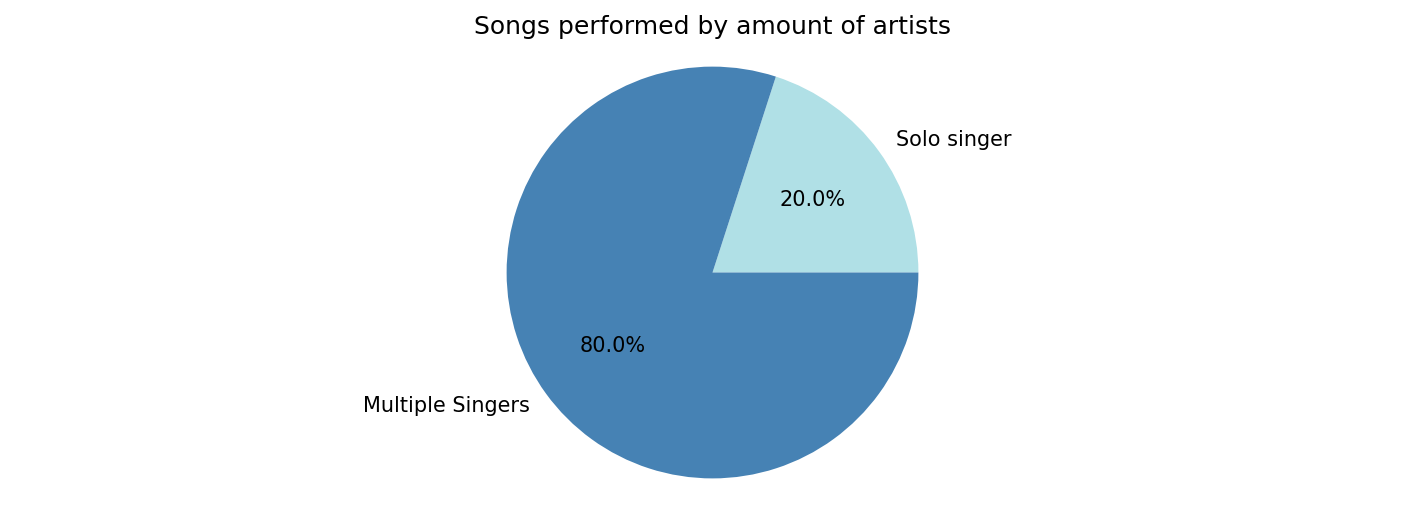

In [175]:
# percentage of songs performed by a single artist vs. multiple artists
solo_artist = (df[df['other artists'] != "None"]["other artists"].count() / df.shape[0])
multi_artist = (df[df['other artists'] == "None"]["other artists"].count() / df.shape[0])

# percentages, labels, and colors for pie chart
percentages = [solo_artist, multi_artist]
my_labels = 'Solo singer', 'Multiple Singers'
my_colors = ['powderblue','steelblue']

# plot pie chart with percentages rounded to 1 decimal point
plt.figure(figsize=(12,4),dpi=150)
plt.pie(percentages, labels=my_labels, autopct='%1.1f%%', colors=my_colors)
plt.title("Songs performed by amount of artists")
plt.axis('equal');

Interestingly enough, the majority of the songs that appeared on the Billboard Year-End charts are those that were performed with multiple performers.

**Are there songs that have appeared most often on Billboard charts?**

In [314]:
# group by artist first as there may be songs with the same title and performed by different artists,
# then take the 10 most common songs
df.groupby(['artist','title']).size().nlargest(10)

artist               title                     
3 Doors Down         Here Without You              2
                     Kryptonite                    2
5 Seconds of Summer  Youngblood                    2
69 Boyz              Tootsee Roll                  2
98 Degrees           Because of You                2
Aaliyah              The One I Gave My Heart To    2
Ace of Base          All That She Wants            2
Adele                Hello                         2
                     Rolling in the Deep           2
Akon                 Smack That                    2
dtype: int64

Seems like the most amount of times that a song can occur on the Billboard Year-End charts is just 2. There isn't much else we can analyze from here, so let's move on.

# Part 3: Exploring the popularity field

**What are the most and least popular songs?**

In [13]:
# most popular songs
df[['title','artist','other artists','year','Popularity']].sort_values(by='Popularity', ascending=False).nlargest(10, 'Popularity')

,title,artist,other artists,year,Popularity
6044,Mood,24kGoldn,Iann Dior,2020,100
6064,All I Want for Christmas Is You,Mariah Carey,None,2020,99
5998,Blinding Lights,The Weeknd,None,2020,99
6002,Rockstar,DaBaby,Roddy Ricch,2020,95
6021,WAP,Cardi B,Megan Thee Stallion,2020,95
6035,Dynamite,BTS,None,2020,94
6046,For the Night,Pop Smoke,Lil Baby,2020,94
6017,Watermelon Sugar,Harry Styles,None,2020,94
6038,Laugh Now Cry Later,Drake,Lil Durk,2020,93
5924,Someone You Loved,Lewis Capaldi,None,2019,92


In [14]:
# least popular songs
df[['title','artist','other artists','year','Popularity']].sort_values(by='Popularity', ascending=False).nsmallest(10, 'Popularity')

,title,artist,other artists,year,Popularity
1697,Disco Duck,Rick Dees,His Cast of Idiots,1976,0
456,Baby I Need Your Loving,The Four Tops,None,1964,0
1158,Sweet City Woman,The Stampeders,None,1971,0
3566,This Lil' Game We Play,Subway,702,1995,0
538,The Jolly Green Giant,The Kingsmen,None,1965,0
3093,Whole Wide World,A'Me Lorain,None,1990,0
3994,Music of My Heart,'N Sync,Gloria Estefan,1999,0
3106,I Like the Way (The Kissing Game),Hi-Five,None,1991,0
2499,Careless Whisper,Wham!,None,1985,0
980,Tracy,The Cuff Links,None,1969,0


**How does popularity of songs change by year?**

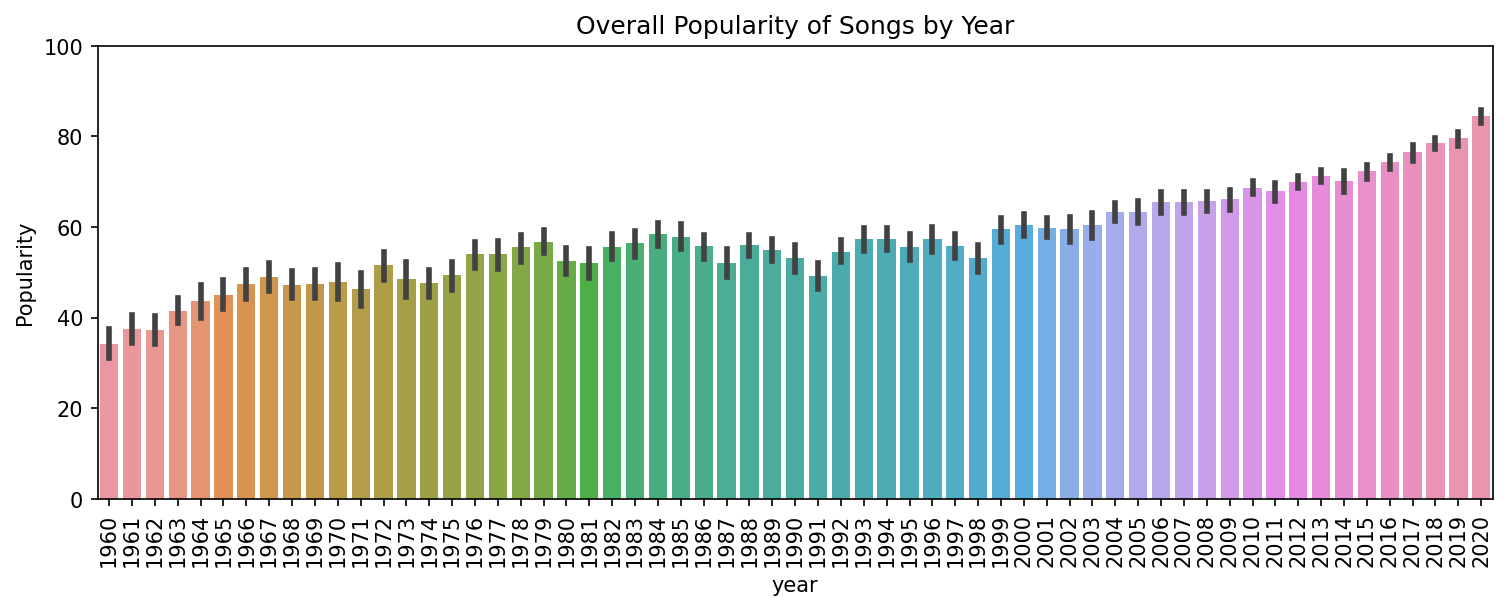

In [15]:
plt.figure(figsize=(12,4),dpi=150)
plt.title("Overall Popularity of Songs by Year")

# barplot of popularity by year
sns.barplot(data = df, x='year', y='Popularity')

# set y limits
plt.ylim(0,100)

# rotate labels on x-axis to be vertical
plt.xticks(rotation=90);

# save image
plt.savefig('popularity_year.png',dpi=200);

From the barplot above, we can see that songs generally get more popular as the year increases. 

**Key points to make:**

First, it looks like the most popular songs were those that appeared on the Billboard charts for 2020. This makes sense as the data was extracted around the time that Billboard released their 2020 Year-End chart, and the measure of the Popularity field is based on how popular the song was at the time the data was extracted.

Second, the least popular songs were those that appeared on older Billboard charts, mainly in years before 2000. Again, based on the date of when the data was extracted, we expect that older songs will not be as popular as newly released songs.

Since the data was extracted near 2020, we will focus on exploring the popularity of songs that appeared in the 2020 Year-End chart. We will then see if there how popularity is distributed among these songs.

**Does Billboard's 2020 Year-End chart really take into account of a song's popularity for rankings?**

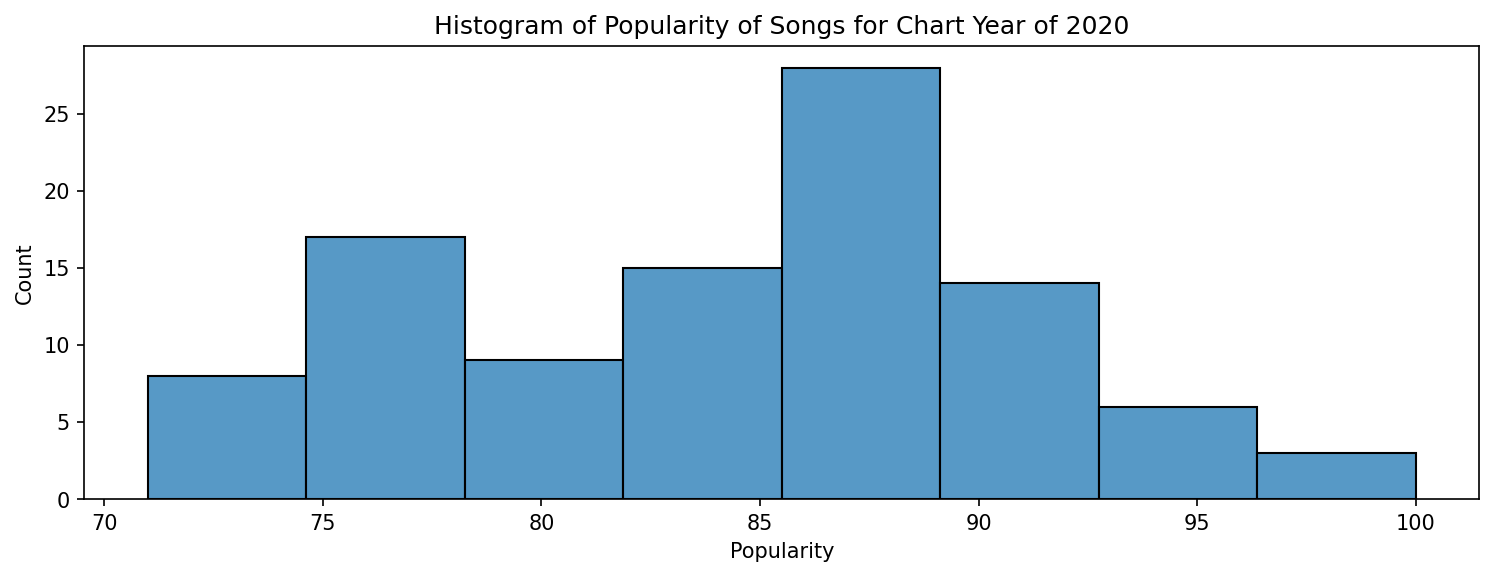

In [16]:
# Histogram of popularity of songs for chart year 2020
plt.figure(figsize=(12,4),dpi=150)
plt.title("Histogram of Popularity of Songs for Chart Year of 2020")

sns.histplot(data = df[df['year'] == 2020], x='Popularity');

A lot of these songs are quite popular! The lowest popularity score is only in the 70s. It may seem like Billboard really does take into account of a song's popularity for ranking songs that appear in their charts. Out of curiosity, let's see which songs were the most and least popular of 2020.

In [17]:
# most popular songs of 2020
df[df['year'] == 2020].sort_values('Popularity', ascending=False).head(10)[['rank','title','artist','Popularity']]

,rank,title,artist,Popularity
6044,47,Mood,24kGoldn,100
5998,1,Blinding Lights,The Weeknd,99
6064,67,All I Want for Christmas Is You,Mariah Carey,99
6002,5,Rockstar,DaBaby,95
6021,24,WAP,Cardi B,95
6017,20,Watermelon Sugar,Harry Styles,94
6046,49,For the Night,Pop Smoke,94
6035,38,Dynamite,BTS,94
6038,41,Laugh Now Cry Later,Drake,93
6040,43,Death Bed,Powfu,92


In [18]:
# least popular songs of 2020
df[df['year'] == 2020].sort_values('Popularity', ascending=False).tail(10)[['rank','title','artist','Popularity']]

,rank,title,artist,Popularity
6070,73,I Hope You're Happy Now,Carly Pearce,75
6095,98,Said Sum,Moneybagg Yo,75
6049,52,Nobody but You,Blake Shelton,74
6062,65,Die from a Broken Heart,Maddie,74
6066,69,Hard to Forget,Sam Hunt,74
6088,91,Bluebird,Miranda Lambert,73
6090,93,Does to Me,Luke Combs,73
6086,89,Homesick,Kane Brown,72
6067,70,One Margarita,Luke Bryan,72
6050,53,Trampoline,Shaed,71


**What is the correlation between ranking and popularity?**

One more thing I'd like to explore is if there is some association between the popularity of a song and the rank it gets on the Billboard charts. Since the popularity field is largely determined by when the data was pulled, it would make most sense to just limit our observation to the 2020 Year-End chart.

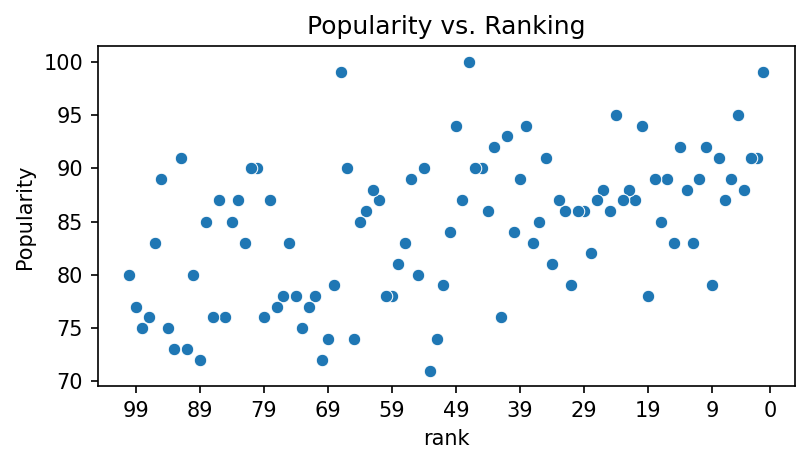

In [19]:
plt.figure(figsize=(6,3),dpi=150)
plt.title("Popularity vs. Ranking")

# scatterplot between rank and popularity for year 2020
sns.scatterplot(x=df['rank'],y='Popularity',data=df[df['year'] == 2020])

# set x-ticks so they don't get cluttered
plt.xticks([0,9,19,29,39,49,59,69,79,89,99])

# inverting the x-axis
plt.xlim(reversed(plt.xlim()));

In [5]:
# correlation coefficient between ranking and popularity
round(abs(df[df['year'] == 2020]['rank'].corr(df[df['year'] == 2020]['Popularity'])),2)

0.49

With a correlation coefficient of `r = 0.49`, there is a moderately strong relationship between the popularity of a song and how high it ranks on the Billboard Year-End charts. That is, the higher popularity a song is, the higher rank it is on the chart.

Popularity may more or less determine how high a song can rank, but keep in mind that Billboard has other factors that determine a song's ranking such as its sales and radioplay. I would say that popularity does have some role on affecting how high a song will rank on the chart.

## Part 4: Exploring the audio features

Let's explore the audio features of each Billboard song and see how they are distributed and if they have any correlations with other fields.

**How are audio features correlated with themselves and with year/rank?**

In [21]:
# create dataframe with only the audio feature fields
features_df = df.copy().iloc[:,7:]

# convert duration from seconds to minutes
features_df['duration'] = round(df['duration'] / 60,2)

features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,0.326,0.3260,0,-15.144,1,0.0297,0.591,0.918000,0.494,0.870,186.232,2.38,3
1,0.469,0.2440,1,-15.702,1,0.0357,0.974,0.016200,0.845,0.577,88.271,2.24,3
2,0.498,0.5820,7,-8.961,1,0.0339,0.412,0.000000,0.372,0.866,119.809,2.40,4
3,0.772,0.2970,5,-14.679,0,0.0530,0.854,0.000008,0.125,0.822,119.987,2.64,4
4,0.570,0.0636,0,-18.548,1,0.0459,0.936,0.000000,0.122,0.282,101.517,2.66,4


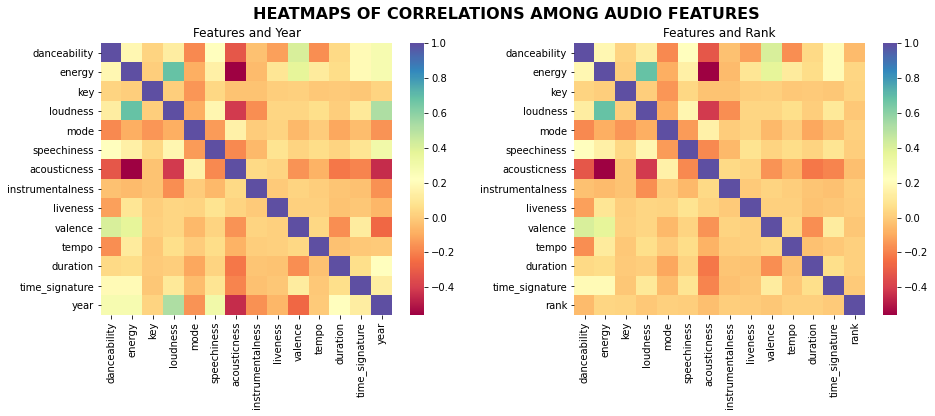

In [22]:
# setting up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.subplots_adjust(wspace=0.3) # adjust width space between plots

# main title
fig.suptitle('HEATMAPS OF CORRELATIONS AMONG AUDIO FEATURES', fontsize=16, fontweight='bold')
axes[0].set_title('Features and Year')
axes[1].set_title('Features and Rank')


# create dataframes for audio features vs. year/ranking
year_features = pd.concat([features_df, df['year']], axis=1)
rank_features = pd.concat([features_df, df['rank']], axis=1)

# plotting heatmaps
sns.heatmap(ax=axes[0],data=year_features.corr(), cmap='Spectral')
sns.heatmap(ax=axes[1],data=rank_features.corr(), cmap='Spectral')

# save image
plt.savefig("heatmaps.png", dpi=200);

**Key takeaways from audio features versus other audio features:**
- Strongest correlations occur with energy vs. loudness, where songs with higher energy are generally associated with songs with higher loudness.
- Moderate correlations occur with valence vs. danceability, and valence vs. energy.
- All other correlations have weak correlations.

**Comparing audio features versus year:**
- The only features with (moderately) strong positive correlations with year are loudness, energy, and danceability. That is, as the year increases, music tends to be more loud, energetic, and have higher danceability to their songs.
- One feature, acousticness, seems to have the lowest correlation with year. As the year increases, songs somewhat tend to have less of an acoustic style to them.

**Comparing audio features versus rankings:**
- There are no correlations whatsoever between the features of a song versus ranking. It seems like the characteristics of songs have no affect on how they get ranked on the Billboard charts.

## Distribution of audio features

**What audio features are most common? How are they all distributed?**

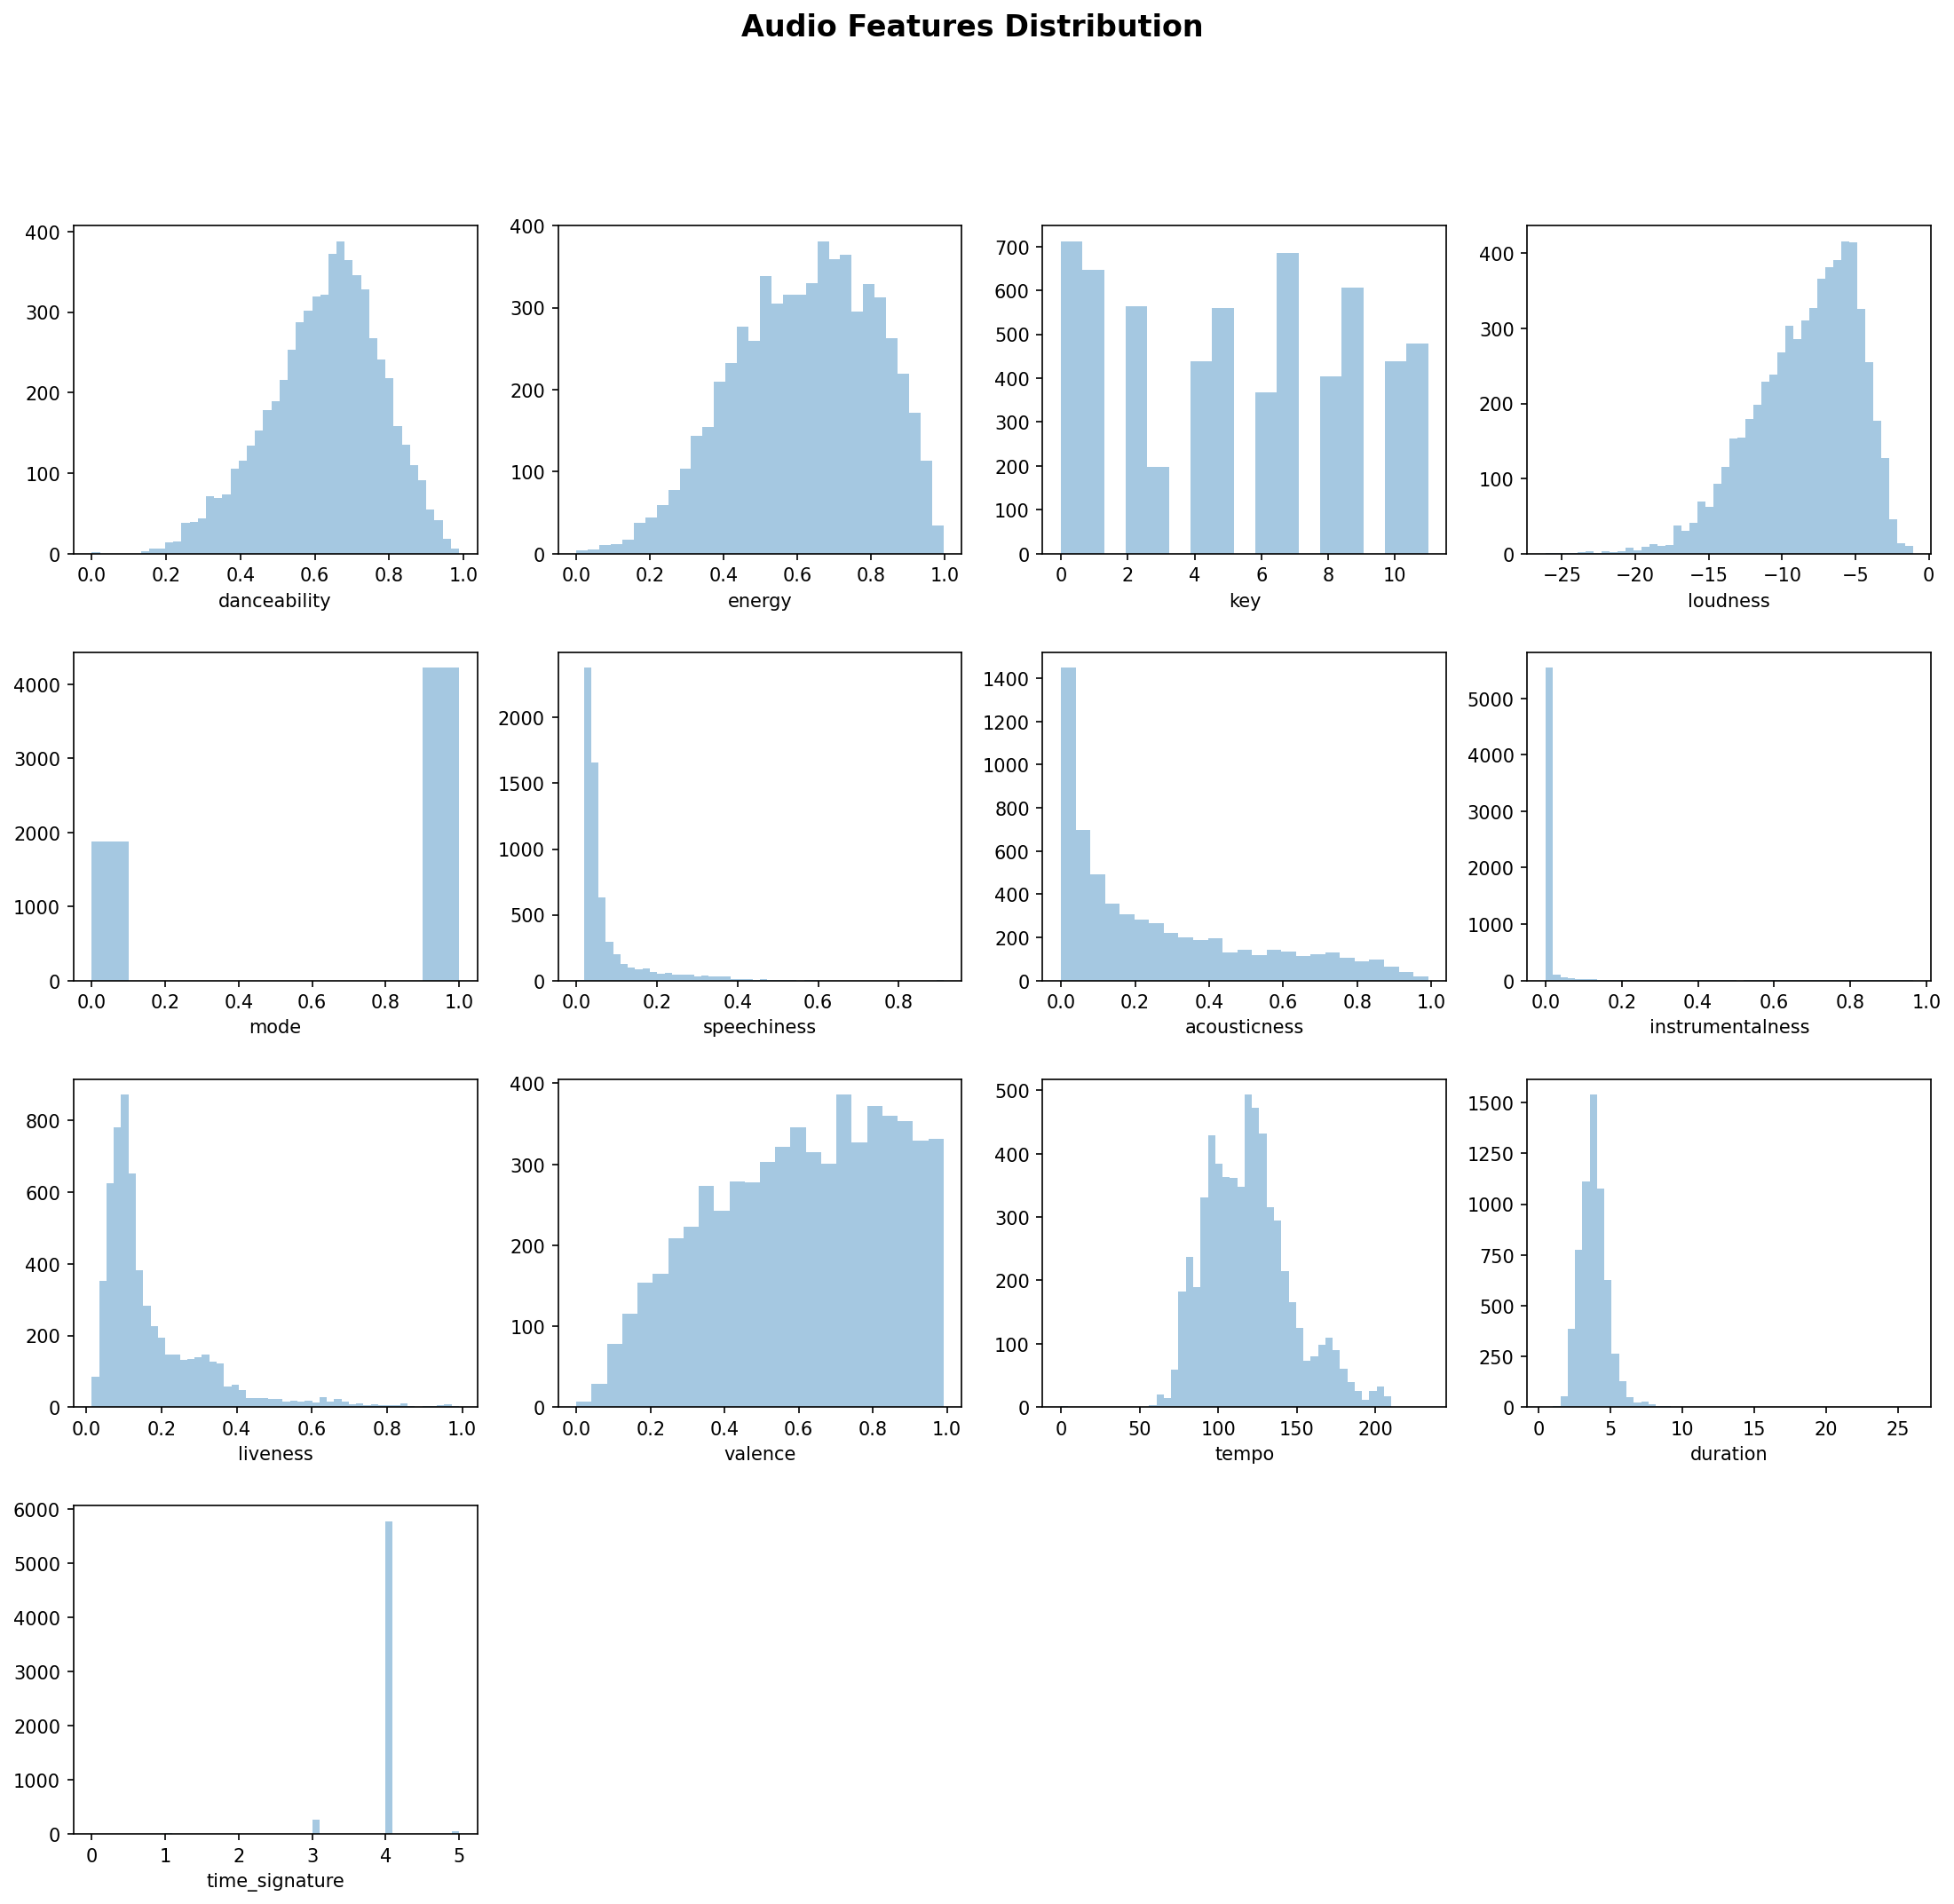

In [25]:
# amount of rows and columns for subplot matrix
rows = 4
columns = 4

# setting up the subplots
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(18, 16), dpi=150)
fig.subplots_adjust(hspace=0.3)
fig.suptitle("Audio Features Distribution",fontsize=16, fontweight='bold')

# used to refer to which field to graph
features_cols = list(features_df.columns)
column = 0

# hide subplots that don't contain graphs
axes[3,1].set_visible(False)
axes[3,2].set_visible(False)
axes[3,3].set_visible(False)

# iterate through each subplot and graph distribution plot
for i in range(rows):
    for j in range(columns):
        try:
            sns.distplot(features_df[features_cols[column]], ax=axes[i,j], kde=False)
            column += 1
        except:
            # if no more to graph, stop iteration
            break

**Key takeaways:**

- Danceability, energy, tempo, and loudness seems to be the most normally distributed features
- Most songs are played in a 4/4 time signature
- Songs on the Billboard charts tend to score low on its speechiness, liveness, and acousticness
- Almost all songs have a very low instrumentalness score, meaning most songs contain vocal tracks

# Conclusion

I was initially interested in seeing how Billboard chooses what songs to rank on their charts and what the characteristics of these songs were. After exploring the data, it seems that the most common artists were singers in the Pop genre, with singers like Madonna and Rihanna taking most of the spots in the Billboard charts. Most of the songs were performed with other singers rather than solo. 

Exploring the popularity of the songs was most intriguing to me as the analysis did seem to show that Billboard does tend to choose popular songs, as they claimed. I was also fascinated by looking at the characteristics of the songs. Newer released songs tend to be more popular than older songs. Newer songs are also generally louder, more energetic, and danceable than older songs, which really shows how music in general has changed over time.